In [2]:
from tdc.single_pred import ADME
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from noiseestimator import NoiseEstimator

In [3]:
data = pd.read_csv('../data/external/Rzepiela/jm1c02090_si_001.csv')
data

,Compound,SMILES,logPeff
0,BAS_52171383,O=C1C2(CCN(Cc3ccc(C(C)C)cc3)CC2)CCCCOCC(C)NC(=...,-5.027334
1,BAS_52501266,Fc1c(F)cc2c(N(C(=O)CC)CCCN(C(C)C)CCCN(C(=O)c3n...,-5.694649
2,BAS_52171354,Clc1cc(CN2CCC3(C(=O)NC(CC(C)C)C(=O)NC(C)COCCCC...,-5.079355
3,BAS_52171391,O=C1C2(CCN(CCCc3ccccc3)CC2)CCCCOCC(C)NC(=O)C(C...,-5.197226
4,BAS_52171377,O=C1C2(CCN(Cc3cc(C)c(C)cc3)CC2)CCCCOCC(C)NC(=O...,-5.079355
...,...,...,...
3595,BAS_51542789,O=C(COC)N1c2c(cccc2)CN(C(=O)c2cc3N(CC)C(=O)N(C...,-8.000000
3596,BAS_51542776,O=C(COC)N1c2c(cccc2)CN(C(=O)c2cc3nc(C)c(C)nc3c...,-8.000000
3597,BAS_52206315,Clc1ccc(CCNC(=O)CN2Cc3c(Oc4c(OCC(C)(C)CCC2)ccc...,-7.522879
3598,BAS_52130699,Fc1ccc(C2NC(=O)C(CO)NC(=O)C(C(C)C)NC(=O)CCC(C(...,-5.588380


<Axes: >

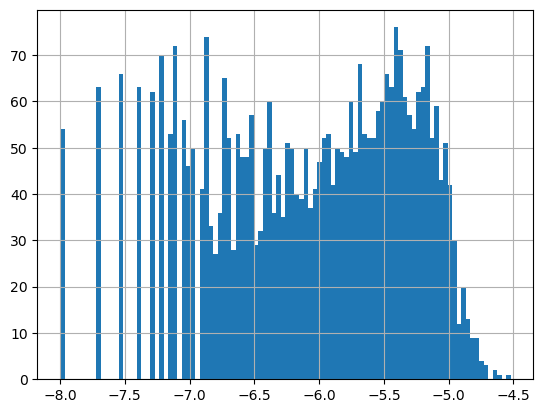

In [4]:
data.logPeff.hist(bins=100)

In [5]:
data.logPeff.to_csv('../data/processed/rzepiela.csv', index=False)

In [4]:
# get data range
data_range = data.logPeff.max() - data.logPeff.min()
data_range

3.4802942000000003

In [4]:
# 1st noise level is ignored for 2 levels
NE = NoiseEstimator(data.logPeff, 0.1, noise_type='asymmetric', asym_bound=-6.7, asym_noise_up=0.2, asym_noise_low=0.6)

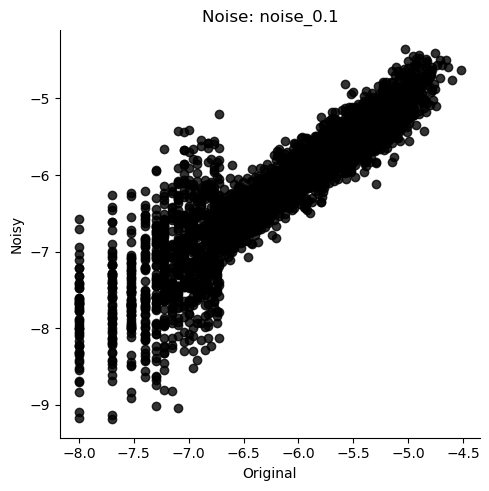

In [5]:
NE.plot()

<Axes: title={'center': 'r2 for different noise levels'}, xlabel='Noise level', ylabel='r2'>

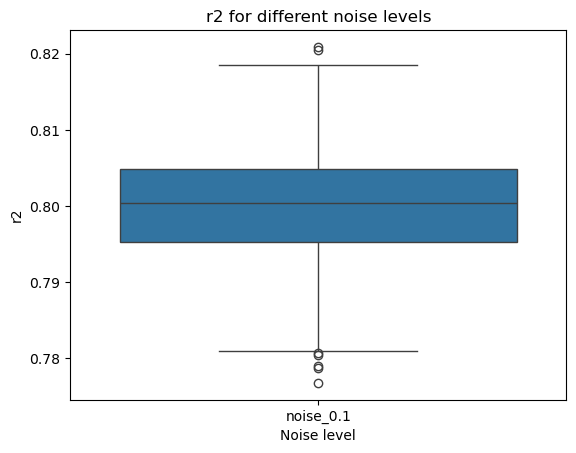

In [6]:
NE.plot_bootstrap()

In [7]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.1,0.242131,0.122836,0.350425,0.800032,0.912939


<Axes: title={'center': 'r2 for different noise levels'}, xlabel='Noise level', ylabel='r2'>

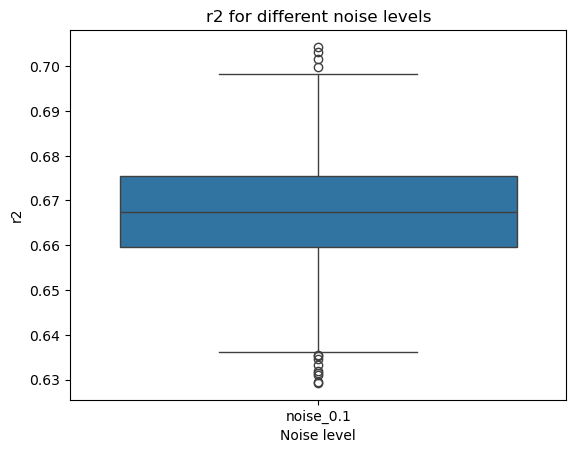

In [8]:
NE = NoiseEstimator(data.logPeff, 0.1, 0.1, noise_type='asymmetric', asym_bound=-6.7, asym_noise_up=0.2, asym_noise_low=0.6)
NE.plot_bootstrap(metric='r2')

In [9]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.1,0.342301,0.245292,0.49519,0.667164,0.83366


In [10]:
NE.noise_bootstraps.r2.to_csv('../data/interim/Rzepiela_r2.csv')